In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import chi2, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve,precision_score, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Load data
df=pd.read_csv('application_data_clean.csv', index_col = 0, na_values= ['XAP', 'XNA', 365243])
df_p=pd.read_csv('previous_application.csv', index_col = 0, na_values= ['XAP', 'XNA', 365243])

C:\Users\cibea\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
def objects(dataframe):
    objectlist = dataframe.dtypes[dataframe.dtypes == 'object'].index
    return objectlist

def numbers(dataframe):
    objectlist = dataframe.dtypes[dataframe.dtypes != 'object'].index
    return objectlist

def integers(dataframe):
    objectlist = dataframe.dtypes[dataframe.dtypes == 'int64'].index
    return objectlist

def floats(dataframe):
    objectlist = dataframe.dtypes[dataframe.dtypes == 'float64'].index
    return objectlist

In [4]:
df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [5]:
df.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 307511 entries, 100002.0 to 456255.0
Data columns (total 121 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_CONTRACT_TYPE            307511 non-null  object 
 1   CODE_GENDER                   307507 non-null  object 
 2   FLAG_OWN_CAR                  307511 non-null  object 
 3   FLAG_OWN_REALTY               307511 non-null  object 
 4   NAME_TYPE_SUITE               306219 non-null  object 
 5   NAME_INCOME_TYPE              307511 non-null  object 
 6   NAME_EDUCATION_TYPE           307511 non-null  object 
 7   NAME_FAMILY_STATUS            307511 non-null  object 
 8   NAME_HOUSING_TYPE             307511 non-null  object 
 9   OCCUPATION_TYPE               211120 non-null  object 
 10  WEEKDAY_APPR_PROCESS_START    307511 non-null  object 
 11  ORGANIZATION_TYPE             252137 non-null  object 
 12  FONDKAPREMONT_MODE            97

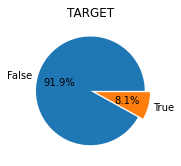

In [7]:
plt.figure(figsize=[2.5,2.5])
plt.pie(df.TARGET.value_counts(), labels=(['False','True']), autopct='%1.1f%%', explode = (0, 0.1))
plt.title('TARGET')
plt.show()

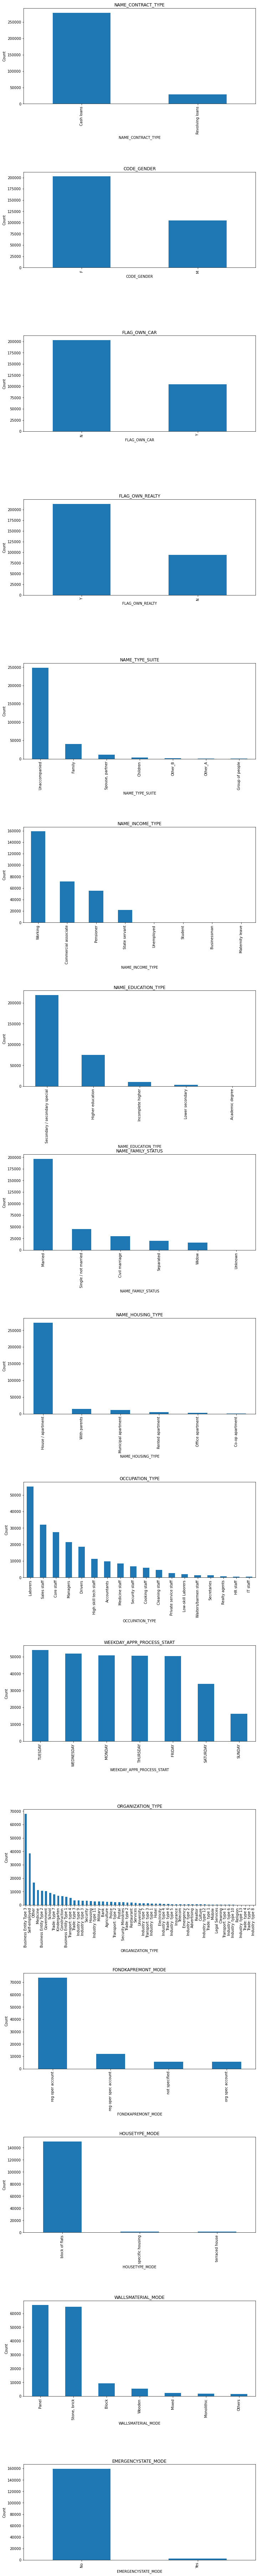

In [8]:
c=1
plt.figure(figsize=[10,100])

for i in objects(df):
    plt.subplot(len(objects(df)), 1, c)
    plt.tight_layout(pad=0.1)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    df[i].value_counts().plot(kind='bar')
    c=c+1

In [9]:
df['COUNT'] = 1

In [10]:
df['AGE']=df['DAYS_BIRTH']/(-365)

In [11]:
df.AGE.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

(array([32079., 65816., 70820., 57491., 55640., 25665.]),
 array([20.        , 28.33333333, 36.66666667, 45.        , 53.33333333,
        61.66666667, 70.        ]),
 <a list of 6 Patch objects>)

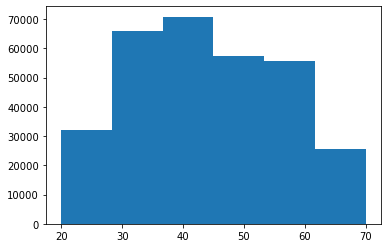

In [12]:
plt.hist(df.AGE, range=(20,70), bins=6)

In [13]:
age_group=[]

for i in df.AGE:
    if i >= 20 and i < 30:
        age_group.append("20 - 29")
    if i >= 30 and i < 40:
        age_group.append("30 - 39")
    if i >= 40 and i < 50:
        age_group.append("40 - 49")
    if i >= 50 and i < 60:
        age_group.append("50 - 59")
    if i >= 60 and i < 70:
        age_group.append("60 - 69")
        
df['AGE_GROUP']=age_group

In [14]:
df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET,COUNT,AGE,AGE_GROUP
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0,0,1,1,25.920548,20 - 29
100003.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,0,0,0,0,0,0,0,1,45.931507,40 - 49
100004.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0,0,0,1,52.180822,50 - 59
100006.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,0,0,0,0,0,0,0,1,52.068493,50 - 59
100007.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,0,0,0,0,0,0,1,54.608219,50 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251.0,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,...,0,0,0,0,0,0,0,1,25.553425,20 - 29
456252.0,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,...,0,0,0,0,0,0,0,1,56.917808,50 - 59
456253.0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,...,0,0,0,0,0,0,0,1,41.002740,40 - 49


<Figure size 108x144 with 0 Axes>

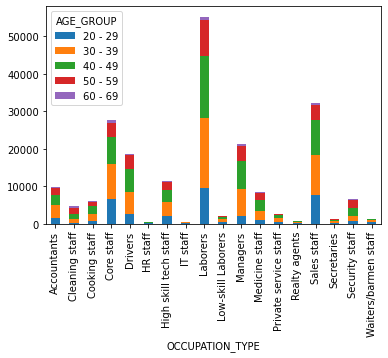

In [15]:
plt.figure(figsize=[1.5,2])
df.groupby(['AGE_GROUP','OCCUPATION_TYPE']).sum().COUNT.unstack(level=0).plot(kind='bar', stacked=True)

<Figure size 108x144 with 0 Axes>

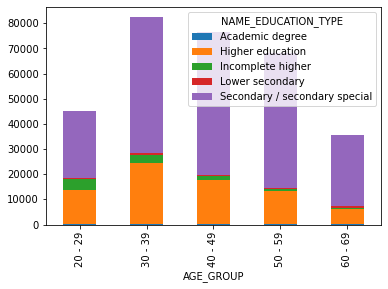

In [16]:
plt.figure(figsize=[1.5,2])
df.groupby(['NAME_EDUCATION_TYPE','AGE_GROUP']).sum().COUNT.unstack(level=0).plot(kind='bar', stacked=True)

In [17]:
cats=objects(df)
h=int((len(cats)*len(cats) -len(cats)))
h

272

%time
fig, axes = plt.subplots(nrows=h, ncols=1, figsize=[7.5, h*3])
position=0

fig.tight_layout(pad=10)

for i in cats:
    for j in cats.drop(i):
        df.groupby([i,j]).sum().COUNT.unstack(level=0).plot(kind='bar', stacked=True, ax=axes[position])
        position = position+1


In [18]:
df

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET,COUNT,AGE,AGE_GROUP
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0,0,1,1,25.920548,20 - 29
100003.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,0,0,0,0,0,0,0,1,45.931507,40 - 49
100004.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0,0,0,1,52.180822,50 - 59
100006.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,0,0,0,0,0,0,0,1,52.068493,50 - 59
100007.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,0,0,0,0,0,0,1,54.608219,50 - 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251.0,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,...,0,0,0,0,0,0,0,1,25.553425,20 - 29
456252.0,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,...,0,0,0,0,0,0,0,1,56.917808,50 - 59
456253.0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,...,0,0,0,0,0,0,0,1,41.002740,40 - 49


In [19]:
df_p

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,NaN,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,NaN,36.0,low_action,Cash X-Sell: low,NaN,-134.0,916.0,NaN,NaN,1.0
2523466,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,NaN,12.0,high,Cash X-Sell: high,NaN,-271.0,59.0,NaN,NaN,1.0
2819243,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,NaN,12.0,middle,Cash X-Sell: middle,NaN,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300464,352015.0,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,...,Furniture,30.0,low_normal,POS industry with interest,NaN,-508.0,362.0,-358.0,-351.0,0.0
2357031,334635.0,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,...,Furniture,12.0,middle,POS industry with interest,NaN,-1604.0,-1274.0,-1304.0,-1297.0,0.0
2659632,249544.0,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,...,Consumer electronics,10.0,low_normal,POS household with interest,NaN,-1457.0,-1187.0,-1187.0,-1181.0,0.0


In [20]:
X_p=df_p.copy()

X_num_p = X_p[numbers(X_p)]
X_cat_p = X_p[objects(X_p)]

boolean_p = X_num_p.columns[X_num_p.max()==1]
cont_p = X_num_p.columns[X_num_p.max()!=1]

X_bool_p = X_num_p[boolean_p]
X_cont_p = X_num_p[cont_p]

## Fill Nan values

for i in X_cat_p:
    new = X_cat_p[i].fillna('NA')
    X_cat_p[i] = new

for i in integers(X_cont_p):
    new = X_cont_p[i].fillna(np.median(X_cont_p[i]))
    X_cont_p[i] = new
    
for i in integers(X_bool_p):
    new = X_bool_p[i].fillna(np.median(X_bool_p[i]))
    X_bool_p[i] = new
    
for i in floats(X_cont_p):
    new = X_cont_p[i].fillna(np.mean(X_cont_p[i]))
    X_cont_p[i] = new
    
frames_p=(X_cat_p,X_cont_p,X_bool_p)
df_p=pd.concat(frames_p, axis=1)

<ipython-input-20-8645192ba28e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat_p[i] = new
<ipython-input-20-8645192ba28e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cont_p[i] = new
<ipython-input-20-8645192ba28e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [21]:
X_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 2030495 to 2418762
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1670213 non-null  float64
 1   NAME_CONTRACT_TYPE           1669868 non-null  object 
 2   AMT_ANNUITY                  1297979 non-null  float64
 3   AMT_APPLICATION              1670214 non-null  float64
 4   AMT_CREDIT                   1670213 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  RATE_INTEREST_PRIMARY        5951 no

In [22]:
df_p.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 2030495 to 2418762
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   NAME_CONTRACT_TYPE           1670214 non-null  object 
 1   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 2   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 3   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 4   NAME_CONTRACT_STATUS         1670214 non-null  object 
 5   NAME_PAYMENT_TYPE            1670214 non-null  object 
 6   CODE_REJECT_REASON           1670214 non-null  object 
 7   NAME_TYPE_SUITE              1670214 non-null  object 
 8   NAME_CLIENT_TYPE             1670214 non-null  object 
 9   NAME_GOODS_CATEGORY          1670214 non-null  object 
 10  NAME_PORTFOLIO               1670214 non-null  object 
 11  NAME_PRODUCT_TYPE            1670214 non-null  object 
 12  CHANNEL_TYPE                 1670214

In [23]:
floats(X_cont_p)

Index(['SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION'],
      dtype='object')

In [24]:
floats(df)

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE

In [25]:
df.to_csv('application_data_clean1.csv')